In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [7]:
X = np.array([[3, 1], [3, -1],[6,1],[6,-1],[1,0],[0,1],[0,-1],[-1,0]])
y = np.array([1,1,1,1,-1,-1,-1,-1])

In [8]:
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

In [9]:
print("alpha:",clf.dual_coef_)
print("w:",clf.coef_)
print("support vectors: \n",clf.support_vectors_)

alpha: [[-0.50024083  0.25012042  0.25012042]]
w: [[ 1.00048166e+00 -1.66533454e-16]]
support vectors: 
 [[ 1.  0.]
 [ 3.  1.]
 [ 3. -1.]]


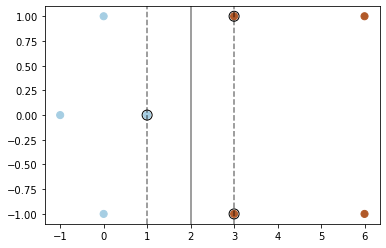

In [10]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=100, linewidth=1, facecolors='none',edgecolors='k');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
plot_svc_decision_function(clf)